## Tow data processing

A pipeline for getting towed CTD data into a workable form.

Step 1: open raw data in ODV, interpolate profiles, export gridded data as netCDF

Step 2: open the netCDF here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [106]:
ds = xr.open_dataset('Winslow Batwing/exported.nc')
ds

/Users/chloecheng/opt/anaconda3/envs/island/lib/python3.12/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


<xarray.Dataset>
Dimensions:              (N_STATIONS: 39222, N_SAMPLES: 1)
Dimensions without coordinates: N_STATIONS, N_SAMPLES
Data variables: (12/20)
    cruise_id            (N_STATIONS) |S20 ...
    station_id           (N_STATIONS) |S20 ...
    station_type         (N_STATIONS) |S1 ...
    longitude            (N_STATIONS) float32 ...
    latitude             (N_STATIONS) float32 ...
    date_time            (N_STATIONS) datetime64[ns] ...
    ...                   ...
    Salinity             (N_STATIONS, N_SAMPLES) float32 ...
    Salinity_qc          (N_STATIONS, N_SAMPLES) float32 ...
    Fluorescence         (N_STATIONS, N_SAMPLES) float32 ...
    Fluorescence_qc      (N_STATIONS, N_SAMPLES) float32 ...
    Section_Distance     (N_STATIONS, N_SAMPLES) float64 ...
    Section_Distance_qc  (N_STATIONS, N_SAMPLES) float32 ...
Attributes:
    Conventions:         CF-1.7
    comment:             ODV NetCDF Export File V2.0
    Creator:             chloecheng@DN5272mk.SUNet
    CreateTime:          2024-05-03T15:19:26
    Software:            Ocean Data View 5.7.0 - 64 bit (macOS arm)
    source:              /Users/chloecheng/Documents/Stanford-SEA/Winslow Bat...
    SourceLastModified:  2015-08-10T05:46:00
    DataField:           Ocean
    DataType:            GeneralType
    Description:

Fix station order by rearranging

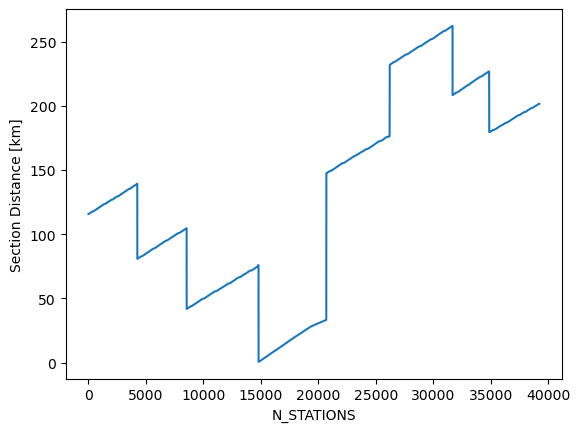

In [55]:
ds.Section_Distance.plot() # demonstration of why we need to rearrange station numbers

In [124]:
indices = np.argsort(ds.Section_Distance.values.squeeze())
rearranged_ds = ds.isel(N_STATIONS=indices) # rearrange stations
rearranged_ds

<xarray.Dataset>
Dimensions:              (N_STATIONS: 39222, N_SAMPLES: 1)
Dimensions without coordinates: N_STATIONS, N_SAMPLES
Data variables: (12/20)
    cruise_id            (N_STATIONS) |S20 ...
    station_id           (N_STATIONS) |S20 ...
    station_type         (N_STATIONS) |S1 ...
    longitude            (N_STATIONS) float32 ...
    latitude             (N_STATIONS) float32 ...
    date_time            (N_STATIONS) datetime64[ns] ...
    ...                   ...
    Salinity             (N_STATIONS, N_SAMPLES) float32 ...
    Salinity_qc          (N_STATIONS, N_SAMPLES) float32 ...
    Fluorescence         (N_STATIONS, N_SAMPLES) float32 ...
    Fluorescence_qc      (N_STATIONS, N_SAMPLES) float32 ...
    Section_Distance     (N_STATIONS, N_SAMPLES) float64 0.5245 0.5245 ... 262.3
    Section_Distance_qc  (N_STATIONS, N_SAMPLES) float32 ...
Attributes:
    Conventions:         CF-1.7
    comment:             ODV NetCDF Export File V2.0
    Creator:             chloecheng@DN5272mk.SUNet
    CreateTime:          2024-05-03T15:19:26
    Software:            Ocean Data View 5.7.0 - 64 bit (macOS arm)
    source:              /Users/chloecheng/Documents/Stanford-SEA/Winslow Bat...
    SourceLastModified:  2015-08-10T05:46:00
    DataField:           Ocean
    DataType:            GeneralType
    Description:

In [131]:
clean_ds = rearranged_ds.set_coords(("latitude", "longitude", "Depth", "Section_Distance", "Date", "Time")).squeeze() # convert some variables to coords and get rid of N_SAMPLES dimension 

In [132]:
clean_ds

<xarray.Dataset>
Dimensions:              (N_STATIONS: 39222)
Coordinates:
    longitude            (N_STATIONS) float32 ...
    latitude             (N_STATIONS) float32 ...
    Date                 (N_STATIONS) float32 ...
    Time                 (N_STATIONS) float32 ...
    Depth                (N_STATIONS) float32 ...
    Section_Distance     (N_STATIONS) float64 0.5245 0.5245 ... 262.3 262.3
Dimensions without coordinates: N_STATIONS
Data variables: (12/14)
    cruise_id            (N_STATIONS) |S20 ...
    station_id           (N_STATIONS) |S20 ...
    station_type         (N_STATIONS) |S1 ...
    date_time            (N_STATIONS) datetime64[ns] ...
    Date_qc              (N_STATIONS) float32 ...
    Time_qc              (N_STATIONS) float32 ...
    ...                   ...
    Temperature_qc       (N_STATIONS) float32 ...
    Salinity             (N_STATIONS) float32 ...
    Salinity_qc          (N_STATIONS) float32 ...
    Fluorescence         (N_STATIONS) float32 ...
    Fluorescence_qc      (N_STATIONS) float32 ...
    Section_Distance_qc  (N_STATIONS) float32 ...
Attributes:
    Conventions:         CF-1.7
    comment:             ODV NetCDF Export File V2.0
    Creator:             chloecheng@DN5272mk.SUNet
    CreateTime:          2024-05-03T15:19:26
    Software:            Ocean Data View 5.7.0 - 64 bit (macOS arm)
    source:              /Users/chloecheng/Documents/Stanford-SEA/Winslow Bat...
    SourceLastModified:  2015-08-10T05:46:00
    DataField:           Ocean
    DataType:            GeneralType
    Description:

In [134]:
clean_ds.Section_Distance

<xarray.DataArray 'Section_Distance' (N_STATIONS: 39222)>
array([  0.524472,   0.524472,   0.524472, ..., 262.267824, 262.267824,
       262.267824])
Coordinates:
    longitude         (N_STATIONS) float32 ...
    latitude          (N_STATIONS) float32 ...
    Date              (N_STATIONS) float32 ...
    Time              (N_STATIONS) float32 ...
    Depth             (N_STATIONS) float32 ...
    Section_Distance  (N_STATIONS) float64 0.5245 0.5245 0.5245 ... 262.3 262.3
Dimensions without coordinates: N_STATIONS
Attributes:
    long_name:            Section Distance
    units:                km
    comment:              
    ancillary_variables:  Section_Distance_qc
    C_format:             %.2f
    FORTRAN_format:       F12.2